In [1]:
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# grid search for model selection
from sklearn.model_selection import GridSearchCV

# linear regression
from sklearn.linear_model import LinearRegression

# logistic regression
from sklearn.linear_model import LogisticRegression

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# adaboost and gradient boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df = pd.read_csv("Shortlisted Train - train.csv")
display(df.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,CollgCr,1Fam,2Story,7,5,...,3,1,Gd,8,0,2,Y,2008,Normal,208500
1,20,RL,80.0,9600,Reg,Veenker,1Fam,1Story,6,8,...,3,1,TA,6,1,2,Y,2007,Normal,181500
2,60,RL,68.0,11250,IR1,CollgCr,1Fam,2Story,7,5,...,3,1,Gd,6,1,2,Y,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Crawfor,1Fam,2Story,7,5,...,3,1,Gd,7,1,3,Y,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,NoRidge,1Fam,2Story,8,5,...,4,1,Gd,9,1,3,Y,2008,Normal,250000


In [4]:
## Identify how many house style in the dataset
df.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

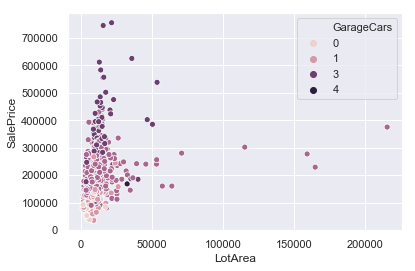

In [5]:
## Price vs Lot Area with GarageCars in color

sns.scatterplot(x="LotArea", y="SalePrice", data=df, hue= "GarageCars" )

#### Identifying and analysing outliers:

In [6]:
df_outlier = df

In [7]:
df_outlier.drop(df_outlier.iloc[:, 0:3], inplace=True, axis=1)
df_outlier.drop(df_outlier.iloc[:, 1:5], inplace=True, axis=1)
#display(house_data)
df_outlier.drop(df_outlier.iloc[:, 2:15], inplace=True, axis=1)
df_outlier.drop(df_outlier.iloc[:, 3:18], inplace=True, axis=1)
df_outlier.head(5)

,LotArea,OverallQual,GrLivArea,SalePrice
0,8450,7,1710,208500
1,9600,6,1262,181500
2,11250,7,1786,223500
3,9550,7,1717,140000
4,14260,8,2198,250000


In [8]:
outlier = df_outlier.loc[df_outlier['LotArea'] >= 100000, :]
outlier.head()

,LotArea,OverallQual,GrLivArea,SalePrice
249,159000,6,2144,277000
313,215245,7,2036,375000
335,164660,5,1786,228950
706,115149,7,1824,302000


In [9]:
df = pd.read_csv("Shortlisted Train - train.csv")
display(df.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,CollgCr,1Fam,2Story,7,5,...,3,1,Gd,8,0,2,Y,2008,Normal,208500
1,20,RL,80.0,9600,Reg,Veenker,1Fam,1Story,6,8,...,3,1,TA,6,1,2,Y,2007,Normal,181500
2,60,RL,68.0,11250,IR1,CollgCr,1Fam,2Story,7,5,...,3,1,Gd,6,1,2,Y,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Crawfor,1Fam,2Story,7,5,...,3,1,Gd,7,1,3,Y,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,NoRidge,1Fam,2Story,8,5,...,4,1,Gd,9,1,3,Y,2008,Normal,250000


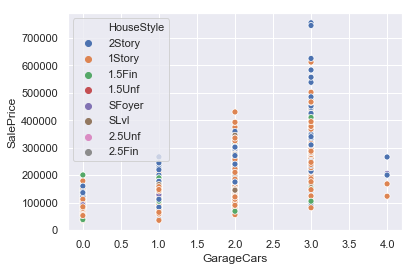

In [10]:
## explore whether house type will affect the sale price 
plt.ylabel('Price ($)')
plt.xlabel('Number of cars in the garage')
sns.scatterplot(df.GarageCars, df.SalePrice,hue=df.HouseStyle)

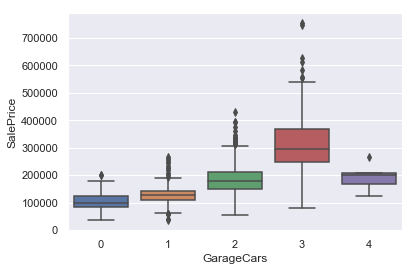

In [11]:
## Price box plot for the different garage cars number
plt.ylabel('Price ($)')
plt.xlabel('Number of cars in the garage')
sns.boxplot(df.GarageCars, df.SalePrice)

Text(0.5, 1.0, 'Impact of HouseStyle on Price')

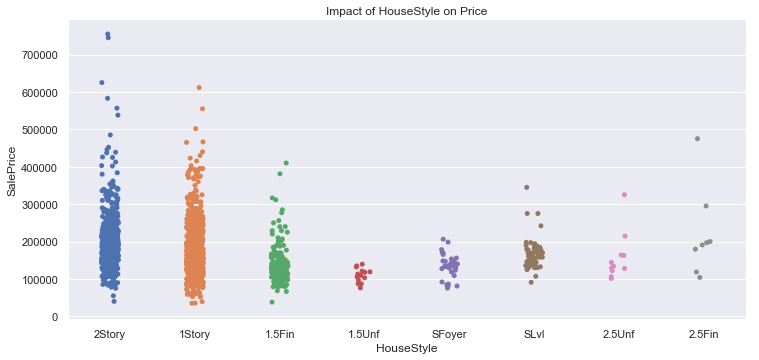

In [12]:
## Price vs House Style
sns.catplot(x="HouseStyle", y="SalePrice" ,data=df, aspect= 24/11.27)
plt.title("Impact of HouseStyle on Price")

In [13]:

##data cleanning for Multiple linear regression model 
#LotFrontage, fill in NAs with mean
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())

#BsmtFinType1, categorical basement feature, Na means there isn't a basement, so we can substitute with 'None'
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
  

In [14]:
## check NA
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinType1     0
BsmtFinSF1       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
TotalFullBath    0
TotalHalfBath    0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
PavedDrive       0
YrSold           0
SaleCondition    0
SalePrice        0
dtype: int64

In [15]:
#Converting categorical variables and misinterpreted features

#MSSubClass
df['MSSubClass'] = df['MSSubClass'].apply(str)

#Year
df['YrSold'] = df['YrSold'].astype(str)

#YearBuilt
df['YearBuilt'] = df['YearBuilt'].astype(str)

#YearRemodAdd
df['YearRemodAdd'] = df['YearRemodAdd'].astype(str)

In [16]:
#Convert 'CentralAir' yes/no to 1/0
df['CentralAir'] = df['CentralAir'].replace("N", 0).replace("Y", 1)

#Labelencoder to scale as numeric (1 to n) for other categories 
from sklearn.preprocessing import LabelEncoder
cols = ('ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 'BldgType',
        'LotShape', 'PavedDrive', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'ExterQual')

# Process columns and apply LabelEncoder to transform 
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# Lotfrontage should be int, not float (data type retained because we filled in NAs previously) Convert:
df.LotFrontage = df.LotFrontage.astype(int)

#Check data types
df.dtypes

MSSubClass       object
MSZoning         object
LotFrontage       int32
LotArea           int64
LotShape          int64
Neighborhood     object
BldgType          int64
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
ExterQual         int64
ExterCond         int64
Foundation       object
BsmtFinType1      int64
BsmtFinSF1        int64
TotalBsmtSF       int64
Heating          object
HeatingQC         int64
CentralAir        int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
TotalFullBath     int64
TotalHalfBath     int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual       int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageCars        int64
PavedDrive        int64
YrSold            int64
SaleCondition    object
SalePrice         int64
dtype: object

In [17]:
#First creating 2 new dataframes, d1 as all the predictors we are keeping, d2 as the target (price)
#  i.e.  dropped the bathroom columns for basement/above ground because we already have the total count

d1 = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
         'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
         'Exterior1st', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 
         'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'GrLivArea', 'TotalFullBath', 
         'TotalHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 
         'Fireplaces', 'GarageCars', 'PavedDrive', 'YrSold', 'SaleCondition']]

d2 = df[['SalePrice']]

In [18]:
#SaleCondition - normal, bankrupt, family, etc. 
dummy_salecond = pd.get_dummies(d1["SaleCondition"],drop_first=True)

#MSZoning
dummy_zoning = pd.get_dummies(d1["MSZoning"],drop_first=True)

#Neighborhood
dummy_neighborhood = pd.get_dummies(d1["Neighborhood"],drop_first=True)

#HouseStyle
dummy_housestyle = pd.get_dummies(d1["HouseStyle"],drop_first=True)

#Exterior1st
dummy_exterior = pd.get_dummies(d1["Exterior1st"],drop_first=True)

#Foundation
dummy_foundation = pd.get_dummies(d1["Foundation"],drop_first=True)

#Heating
dummy_heating = pd.get_dummies(d1["Heating"],drop_first=True)

#MSSubClass
dummy_mssub = pd.get_dummies(d1["MSSubClass"],drop_first=True)


d1 = pd.concat([d1, dummy_salecond, dummy_zoning, dummy_neighborhood, dummy_housestyle, 
               dummy_exterior, dummy_foundation, dummy_heating, dummy_mssub],axis=1)

# Remove original columns after one-hot completed (no longer needed)? But first column already dropped.
#d1.drop(["HouseStyle","Heating","SaleCondition"],axis=1,inplace=True)


# Dropping even more uncorrelated variables or avoid multicollinearity? Up to interpretation


## Multiple linear regression model

In [19]:
## define the variables
d1.drop(["MSSubClass","MSZoning","Neighborhood","HouseStyle","Exterior1st","Foundation","Heating","SaleCondition"],axis=1,inplace=True)
X = d1
y = d2['SalePrice']

In [24]:
## fit the linear regression model
from sklearn import linear_model
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(d1, d2, test_size=0.20)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)


In [25]:
## apply the model to predict the price on the test set 
predictions = lm.predict(X_test)
#print(predictions)

In [26]:
## calculated the R^2 to measure the accuracy on tesr set
lm.score(X_test,y_test)

0.8747504109881072

In [27]:
## calculated RMSE for the model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions))
print("model Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test,predictions))))
print("model Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test,predictions)))

model Root Mean Squared Error: 25113.906033653373
model Mean Absolute Error: 18492.386323210743
